In [1]:
from sematch.semantic.similarity import YagoTypeSimilarity  # Ganti dengan YagoTypeSimilarity
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from itertools import combinations
from googletrans import Translator
from deep_translator import GoogleTranslator
import nltk
import re



import string
import math
import nltk
import random
import pandas as pd
import numpy as np
import time as tm
import matplotlib.pyplot as plt
import statistics as stats
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet2021 as wn21
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('./assets/dataset.csv', delimiter='\t', header=None, index_col=False)
df

,0
0,"basis data relasional keuntungan "" mudah m..."
1,"basis data relasional keuntungan "" mudah m..."
2,"basis data keuntungan "" mudah mengoperasi ..."
3,"basis data relasional keuntungan "" mudah me..."
4,"basis data relasional menggunakan "" tabel d..."
5,"basis data relasional pengertian "" tabel du..."
6,"basis data relasional keuntungan "" mudah me..."
7,"basis data relasional menggunakan "" tabel d..."
8,"basis data relasional menggunakan "" tabel d..."
9,"basis data relasional menggunakan "" tabel 2..."


In [26]:
nltk.download('wordnet2021')

[nltk_data] Downloading package wordnet2021 to
[nltk_data]     C:\Users\Reowi\AppData\Roaming\nltk_data...


True

In [3]:
def translate_to_english(text):
    translated = GoogleTranslator(source='auto', target='en').translate(text)
    return translated

In [4]:
def casefolding(text):
    text = translate_to_english(text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()
    return text



In [5]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  return text

In [6]:
%%time
for i in df.columns:
  df[i]=df[i].apply(text_preprocessing_process)

CPU times: total: 62.5 ms
Wall time: 11.9 s


In [8]:
from sematch.semantic.similarity import YagoTypeSimilarity

def wup_sims(set1, set2):
    wn_sim = YagoTypeSimilarity()
    def label_words(words):
        tagged_words = nltk.pos_tag(words)
        labeled_words = {'nouns': [], 'verbs': []}
        
        for word, pos in tagged_words:
            if pos.startswith('N'):
                labeled_words['nouns'].append(word)
            elif pos.startswith('V'):
                labeled_words['verbs'].append(word)
        
        return labeled_words

    def calculate_max_similarity(wdlist0, wdlist1):
        maximos = []
        vals = []
        aux = 0
        for wd0 in wdlist0:
            syn0 = wn21.synsets(wd0)

            if len(syn0) > 0:
                vals.clear()
                for wd1 in wdlist1:
                    syn1 = wn21.synsets(wd1)

                    if len(syn1) > 0:
                        aux = wn_sim.wup(syn0[0], syn1[0])

                        if aux == 1:
                            break

                        else:
                            vals.append(aux)

                if aux == 1:
                    maximos.append(aux)

                else:
                    maximos.append(max(vals))
        if len(maximos) == 0:
            return 0 
        else:
            return round(sum(maximos) / len(maximos), 4)


    labeled_set1 = label_words(set1)
    labeled_set2 = label_words(set2)

    max_similarity_noun = []
    max_similarity_verb = []

    for noun in labeled_set1['nouns']:
        max_similarity_noun.append(calculate_max_similarity([noun], labeled_set2['nouns']))
        
    for verb in labeled_set1['verbs']:
        max_similarity_verb.append(calculate_max_similarity([verb], labeled_set2['verbs']))

    total_max_similarity_noun = sum(max_similarity_noun) / len(max_similarity_noun) if len(max_similarity_noun) > 0 else 0
    total_max_similarity_verb = sum(max_similarity_verb) / len(max_similarity_verb) if len(max_similarity_verb) > 0 else 0

    weighted_average_similarity = (total_max_similarity_noun * 0.75) + (total_max_similarity_verb * 0.25)

    return weighted_average_similarity


In [44]:
from sematch.semantic.similarity import YagoTypeSimilarity

def wup_sims2(set1, set2):
    wn_sim = YagoTypeSimilarity()
    def label_words(words):
        tagged_words = nltk.pos_tag(words)
        labeled_words = {'nouns': [], 'verbs': []}
        
        for word, pos in tagged_words:
            if pos.startswith('N'):
                labeled_words['nouns'].append(word)
            elif pos.startswith('V'):
                labeled_words['verbs'].append(word)
        
        return labeled_words

    def calculate_max_similarity(wdlist0, wdlist1):
        maximos = []
        vals = []
        aux = 0
        for wd0 in wdlist0:
            syn0 = wn21.synsets(wd0)

            if len(syn0) > 0:
                vals.clear()
                for wd1 in wdlist1:
                    syn1 = wn21.synsets(wd1)

                    if len(syn1) > 0:
                        aux = wn_sim.wup(syn0[0], syn1[0])

                        if aux == 1:
                            break

                        else:
                            vals.append(aux)

                if aux == 1:
                    maximos.append(aux)

                else:
                    maximos.append(max(vals))
        if len(maximos) == 0:
            return 0 
        else:
            return round(sum(maximos) / len(maximos), 4)


    labeled_set1 = label_words(set1)
    labeled_set2 = label_words(set2)

    max_similarity_noun = []
    max_similarity_verb = []

    for noun in labeled_set1['nouns']:
        max_similarity_noun.append(calculate_max_similarity([noun], labeled_set2['nouns']))
        
    for verb in labeled_set1['verbs']:
        max_similarity_verb.append(calculate_max_similarity([verb], labeled_set2['verbs']))

    total_max_similarity_noun = sum(max_similarity_noun) / len(max_similarity_noun) if len(max_similarity_noun) > 0 else 0
    total_max_similarity_verb = sum(max_similarity_verb) / len(max_similarity_verb) if len(max_similarity_verb) > 0 else 0

    weighted_average_similarity = (total_max_similarity_noun * 0.25) + (total_max_similarity_verb * 0.75)

    return weighted_average_similarity


In [10]:

# Inisialisasi list untuk menyimpan teks
texts = [df[0][i] for i in range(len(df))]

# Inisialisasi dictionary untuk menyimpan nilai Jaccard similarity
yago_score = {}
score_teach = {}
teacher_index = 27


In [11]:
import nltk
import time as tm

# Index of the teacher in the dataset
teacher_index = 27

for i in range(len(texts)):
    for j in range(i + 1, len(texts)):
        set_a = nltk.tokenize.word_tokenize(texts[i])
        set_b = nltk.tokenize.word_tokenize(texts[j])
        if (i == teacher_index and j != teacher_index) or (i != teacher_index and j == teacher_index):
            similarity_score = wup_sims(set_a, set_b)
            rounded_score = round(similarity_score, 3) 
            yago_score[(i + 1, j + 1)] = rounded_score
            print(f"{rounded_score}")



0.935
0.838
0.815
0.865
0.836
0.824
0.924
0.89
0.915
0.772
0.852
0.741
0.896
0.755
0.841
0.879
0.841
0.959
0.905
0.905
0.902
0.751
0.844
0.971
0.893
0.868
0.869


In [45]:
# Index of the teacher in the dataset
teacher_index = 27

for i in range(len(texts)):
    for j in range(i + 1, len(texts)):
        set_a = nltk.tokenize.word_tokenize(texts[i])
        set_b = nltk.tokenize.word_tokenize(texts[j])

        if (i == teacher_index and j != teacher_index) or (i != teacher_index and j == teacher_index):
            similarity_score = wup_sims2(set_a, set_b)
            rounded_score = round(similarity_score, 3)  # Bulatkan ke 3 digit dibelakang koma
            yago_score[(i + 1, j + 1)] = rounded_score
            print(f"{rounded_score}")


0.931
0.656
0.738
0.818
0.787
0.856
0.925
0.878
0.972
0.838
0.801
0.683
0.843
0.67
0.835
0.909
0.779
0.989
0.968
0.968
0.92
0.674
0.84
0.99
0.862
0.78
0.778


In [12]:
# Print the results
print("Wu Palmer similarity scores:")
scores = []
pairs = []
for pair, score in yago_score.items():
    print("Students {} and Teacher {}: {}".format(pair[0], pair[1], score))
    scores.append(score)
    pairs.append(pair)

Wu Palmer similarity scores:
Students 1 and Teacher 28: 0.935
Students 2 and Teacher 28: 0.838
Students 3 and Teacher 28: 0.815
Students 4 and Teacher 28: 0.865
Students 5 and Teacher 28: 0.836
Students 6 and Teacher 28: 0.824
Students 7 and Teacher 28: 0.924
Students 8 and Teacher 28: 0.89
Students 9 and Teacher 28: 0.915
Students 10 and Teacher 28: 0.772
Students 11 and Teacher 28: 0.852
Students 12 and Teacher 28: 0.741
Students 13 and Teacher 28: 0.896
Students 14 and Teacher 28: 0.755
Students 15 and Teacher 28: 0.841
Students 16 and Teacher 28: 0.879
Students 17 and Teacher 28: 0.841
Students 18 and Teacher 28: 0.959
Students 19 and Teacher 28: 0.905
Students 20 and Teacher 28: 0.905
Students 21 and Teacher 28: 0.902
Students 22 and Teacher 28: 0.751
Students 23 and Teacher 28: 0.844
Students 24 and Teacher 28: 0.971
Students 25 and Teacher 28: 0.893
Students 26 and Teacher 28: 0.868
Students 27 and Teacher 28: 0.869


In [13]:
print("Nilai tertinggi Guru dan Siswa : ", np.max(scores))
print("--------------------------------")
print("Nilai terendah Guru dan Siswa :", np.min(scores))
print("--------------------------------")
print("Nilai rata-rata Guru dan Siswa :", np.mean(scores))

Nilai tertinggi Guru dan Siswa :  0.971
--------------------------------
Nilai terendah Guru dan Siswa : 0.741
--------------------------------
Nilai rata-rata Guru dan Siswa : 0.8624444444444443


In [35]:
threshold1 = 0.7
countS   = 0
countD = 0
for pair, score in yago_score.items():
    if score > threshold1:
      countS = countS+1
    else:
      countD = countD+1
print("Jumlah Data Mirip : ", countS)
print("Jumlah Data Tidak Mirip : ", countD)

Jumlah Data Mirip :  27
Jumlah Data Tidak Mirip :  0


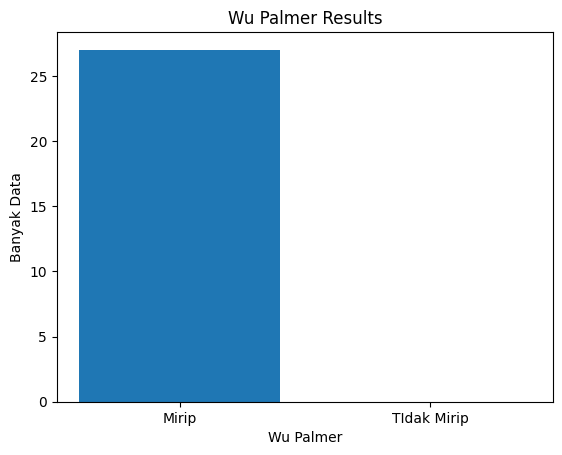

In [36]:
import matplotlib.pyplot as plt

# Data
labels = ['Mirip', 'TIdak Mirip']
values = [countS, countD]

# Visualisasi
plt.bar(labels, values)
plt.xlabel('Wu Palmer')
plt.ylabel('Banyak Data')
plt.title('Wu Palmer Results')
plt.show()

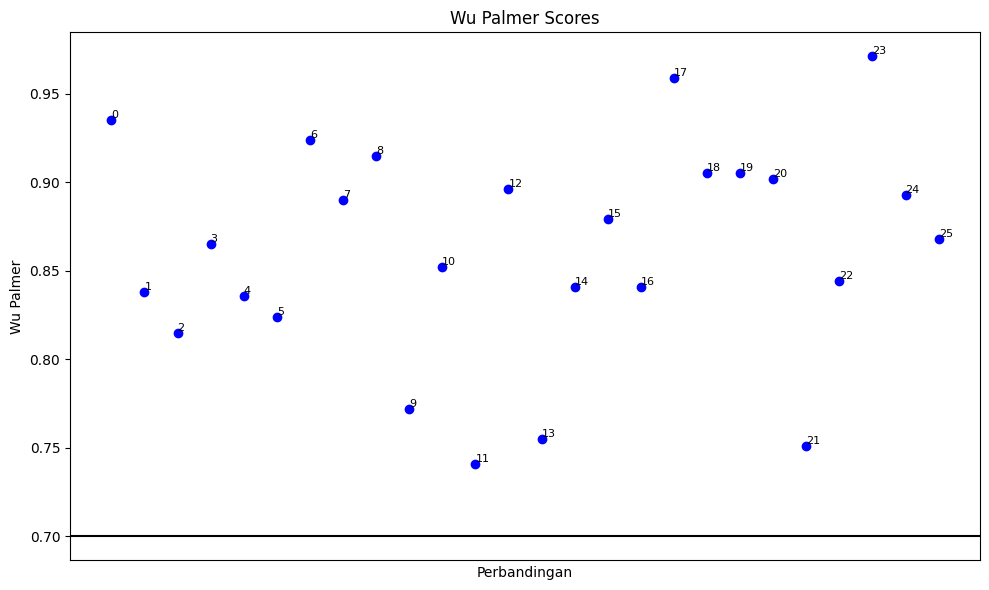

In [38]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
# Extract texts and scores
textsplot = [str(pair[0]) + " and " + str(pair[1]) for pair in yago_score.keys()]
scoresplot = list(yago_score.values())

for i in range(len(scores)-1):
  if scores[i]>threshold1:
    plt.scatter(textsplot[i], scoresplot[i], color='blue', marker='o')
  else:
    plt.scatter(textsplot[i], scoresplot[i], color='red', marker='o')
  
  plt.text(textsplot[i], scoresplot[i], str(i), ha='left', va='bottom', fontsize=8)

# Menambahkan garis threshold pada scatter plot
plt.axhline(y=threshold1, color='black', linestyle='solid', label='Threshold')
# plt.plot(texts, scores)


# Menambahkan judul dan label sumbu
plt.title('Wu Palmer Scores')
plt.xlabel('Perbandingan')
plt.ylabel('Wu Palmer')

# Mengatur rotasi label pada sumbu x untuk keterbacaan
# labels = [x for x in range(1, len(scores)+1)]
# plt.xticks(ticks=range(len(scores)), rotation=90, ha='right', labels=labels)
plt.tick_params(labelbottom = False, bottom = False)

# Menampilkan scatter plot
plt.tight_layout()
plt.show()

In [100]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Data
expert_judgement = [1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
predicted_value = [1,
0,
1,
1,
1,
1,
1,
1,
1,
1,
1,
0,
1,
0,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1
]

# Confusion Matrix
conf_matrix = confusion_matrix(expert_judgement, predicted_value)
print("Confusion Matrix:")
print(conf_matrix)

# Metrics
precision = precision_score(expert_judgement, predicted_value)
recall = recall_score(expert_judgement, predicted_value)
accuracy = accuracy_score(expert_judgement, predicted_value)
f1 = f1_score(expert_judgement, predicted_value)

# Specificity
specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# Display Metrics
print("\nMetrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[ 1  1]
 [ 2 23]]

Metrics:
Precision: 0.9583
Recall: 0.9200
Specificity: 0.9583
Accuracy: 0.8889
F1 Score: 0.9388


In [47]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Data
expert_judgement = [1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
predicted_value = [1,
1,
1,
1,
1,
1,
1,
1,
1,
0,
1,
0,
1,
0,
1,
1,
1,
1,
1,
1,
1,
0,
1,
1,
1,
1,
1,

]

# Confusion Matrix
conf_matrix = confusion_matrix(expert_judgement, predicted_value)
print("Confusion Matrix:")
print(conf_matrix)

# Metrics
precision = precision_score(expert_judgement, predicted_value)
recall = recall_score(expert_judgement, predicted_value)
accuracy = accuracy_score(expert_judgement, predicted_value)
f1 = f1_score(expert_judgement, predicted_value)

# Specificity
specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# Display Metrics
print("\nMetrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[ 0  2]
 [ 4 21]]

Metrics:
Precision: 0.9130
Recall: 0.8400
Specificity: 0.9130
Accuracy: 0.7778
F1 Score: 0.8750


In [48]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Data
expert_judgement = [1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
predicted_value = [1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1

]

# Confusion Matrix
conf_matrix = confusion_matrix(expert_judgement, predicted_value)
print("Confusion Matrix:")
print(conf_matrix)

# Metrics
precision = precision_score(expert_judgement, predicted_value)
recall = recall_score(expert_judgement, predicted_value)
accuracy = accuracy_score(expert_judgement, predicted_value)
f1 = f1_score(expert_judgement, predicted_value)

# Specificity
specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# Display Metrics
print("\nMetrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[ 0  2]
 [ 0 25]]

Metrics:
Precision: 0.9259
Recall: 1.0000
Specificity: 0.9259
Accuracy: 0.9259
F1 Score: 0.9615


In [59]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Data
expert_judgement = [1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
predicted_value = [1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
0,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1


]

# Confusion Matrix
conf_matrix = confusion_matrix(expert_judgement, predicted_value)
print("Confusion Matrix:")
print(conf_matrix)

# Metrics
precision = precision_score(expert_judgement, predicted_value)
recall = recall_score(expert_judgement, predicted_value)
accuracy = accuracy_score(expert_judgement, predicted_value)
f1 = f1_score(expert_judgement, predicted_value)

# Specificity
specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# Display Metrics
print("\nMetrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[ 0  2]
 [ 1 24]]

Metrics:
Precision: 0.9231
Recall: 0.9600
Specificity: 0.9231
Accuracy: 0.8889
F1 Score: 0.9412


In [76]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Data
expert_judgement = [1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
predicted_value = [1,
0,
0,
0,
0,
0,
1,
0,
1,
0,
0,
0,
0,
0,
0,
0,
0,
1,
1,
1,
1,
0,
0,
1,
0,
0,
0,

]

# Confusion Matrix
conf_matrix = confusion_matrix(expert_judgement, predicted_value)
print("Confusion Matrix:")
print(conf_matrix)

# Metrics
precision = precision_score(expert_judgement, predicted_value)
recall = recall_score(expert_judgement, predicted_value)
accuracy = accuracy_score(expert_judgement, predicted_value)
f1 = f1_score(expert_judgement, predicted_value)

# Specificity
specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# Display Metrics
print("\nMetrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[ 2  0]
 [17  8]]

Metrics:
Precision: 1.0000
Recall: 0.3200
Specificity: 1.0000
Accuracy: 0.3704
F1 Score: 0.4848


In [174]:
from sematch.semantic.similarity import YagoTypeSimilarity

def jcn(set1, set2):
    wn_sim = YagoTypeSimilarity()
    def label_words(words):
        tagged_words = nltk.pos_tag(words)
        labeled_words = {'nouns': [], 'verbs': []}
        
        for word, pos in tagged_words:
            if pos.startswith('N'):
                labeled_words['nouns'].append(word)
            elif pos.startswith('V'):
                labeled_words['verbs'].append(word)
        
        return labeled_words

    def calculate_max_similarity(wdlist0, wdlist1):
        maximos = []
        vals = []
        aux = 0
        for wd0 in wdlist0:
            syn0 = wn.synsets(wd0)

            if len(syn0) > 0:
                vals.clear()
                for wd1 in wdlist1:
                    syn1 = wn.synsets(wd1)

                    if len(syn1) > 0:
                        aux = wn_sim.monol_word_similarity(syn0[0], syn1[0], 'eng', 'wup')

                        if aux == 1:
                            break

                        else:
                            vals.append(aux)

                if aux == 1:
                    maximos.append(aux)

                else:
                    maximos.append(max(vals))
        if len(maximos) == 0:
            return 0 
        else:
            return round(sum(maximos) / len(maximos), 4)


    labeled_set1 = label_words(set1)
    labeled_set2 = label_words(set2)

    max_similarity_noun = []
    max_similarity_verb = []

    for noun in labeled_set1['nouns']:
        max_similarity_noun.append(calculate_max_similarity([noun], labeled_set2['nouns']))
        
    for verb in labeled_set1['verbs']:
        max_similarity_verb.append(calculate_max_similarity([verb], labeled_set2['verbs']))

    total_max_similarity_noun = sum(max_similarity_noun) / len(max_similarity_noun) if len(max_similarity_noun) > 0 else 0
    total_max_similarity_verb = sum(max_similarity_verb) / len(max_similarity_verb) if len(max_similarity_verb) > 0 else 0

    weighted_average_similarity = (total_max_similarity_noun * 0.75) + (total_max_similarity_verb * 0.25)

    return weighted_average_similarity


In [175]:
# Index of the teacher in the dataset
teacher_index = 27

for i in range(len(texts)):
    for j in range(i + 1, len(texts)):
        set_a = nltk.tokenize.word_tokenize(texts[i])
        set_b = nltk.tokenize.word_tokenize(texts[j])

        if (i == teacher_index and j != teacher_index) or (i != teacher_index and j == teacher_index):
            similarity_score = jcn(set_a, set_b)
            rounded_score = round(similarity_score, 3)  # Bulatkan ke 3 digit dibelakang koma
            yago_score[(i + 1, j + 1)] = rounded_score
            print(f"{rounded_score}")


AttributeError: 'Synset' object has no attribute 'lower'

In [190]:
from math import log2


def calculate_max_similarity(wdlist0, wdlist1):
    wn_sim = YagoTypeSimilarity()
    maximos = []
    vals = []
    
    for wd0 in wdlist0:
        syn0 = wn.synsets(wd0)

        if len(syn0) > 0:
            vals.clear()
            for wd1 in wdlist1:
                syn1 = wn.synsets(wd1)

                if len(syn1) > 0:
                    aux = wn_sim.lin(syn0[0], syn1[0])

                    if aux == 1:
                        break
                    else:
                        vals.append(aux)

            if aux == 1:
                maximos.append(aux)
            else:
                maximos.append(max(vals))
    
    if len(maximos) == 0:
        return 0 
    else:
        return round(sum(maximos) / len(maximos), 4)


In [191]:
# Index of the teacher in the dataset
teacher_index = 27

for i in range(len(texts)):
    for j in range(i + 1, len(texts)):
        set_a = nltk.tokenize.word_tokenize(texts[i])
        set_b = nltk.tokenize.word_tokenize(texts[j])

        if (i == teacher_index and j != teacher_index) or (i != teacher_index and j == teacher_index):
            similarity_score = calculate_max_similarity(set_a, set_b)
            rounded_score = round(similarity_score, 3)  # Bulatkan ke 3 digit dibelakang koma
            yago_score[(i + 1, j + 1)] = rounded_score
            print(f"{rounded_score}")


WordNetError: Information content file has no entries for part-of-speech: a